In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
dat = pd.read_csv(r'E:\logdata\test_set\log_prehistory_20180715_000000000000.csv')

In [10]:
dat.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00001e52-55c0-470c-8d32-85c691c2019a,1,16,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,True,True,False,0,0,...,0,1,0,False,21,2018-07-14,False,catalog,appload,endplay
1,0_00001e52-55c0-470c-8d32-85c691c2019a,2,16,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,False,False,True,False,1,1,...,0,0,0,False,21,2018-07-14,False,user_collection,clickrow,endplay
2,0_00001e52-55c0-470c-8d32-85c691c2019a,3,16,t_977b3ee2-e7a8-4357-b164-f663446c1a25,False,False,False,True,0,0,...,1,0,1,False,21,2018-07-14,False,user_collection,clickrow,trackdone
3,0_00001e52-55c0-470c-8d32-85c691c2019a,4,16,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,False,True,True,False,0,0,...,1,0,0,False,21,2018-07-14,False,user_collection,trackdone,fwdbtn
4,0_00001e52-55c0-470c-8d32-85c691c2019a,5,16,t_b10f5a2a-ee7b-47c3-9789-4ce0f96c6989,True,True,True,False,0,1,...,0,0,0,False,21,2018-07-14,False,user_collection,fwdbtn,fwdbtn


In [11]:
dat.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [13]:
df = dat[['session_id','track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped','context_switch']]

In [14]:
df.head(10)

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch
0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,True,True,False,0
1,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,False,False,True,False,1
2,0_00001e52-55c0-470c-8d32-85c691c2019a,t_977b3ee2-e7a8-4357-b164-f663446c1a25,False,False,False,True,0
3,0_00001e52-55c0-470c-8d32-85c691c2019a,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,False,True,True,False,0
4,0_00001e52-55c0-470c-8d32-85c691c2019a,t_b10f5a2a-ee7b-47c3-9789-4ce0f96c6989,True,True,True,False,0
5,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,False,True,True,False,0
6,0_00001e52-55c0-470c-8d32-85c691c2019a,t_977b3ee2-e7a8-4357-b164-f663446c1a25,False,False,True,False,0
7,0_00001e52-55c0-470c-8d32-85c691c2019a,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,False,True,True,False,0
8,0_00006529-2d8d-41f8-9f13-7ee65e53ae9a,t_312b3509-48c1-4928-a6e5-d3e7a51c216b,True,True,True,False,0
9,0_00006529-2d8d-41f8-9f13-7ee65e53ae9a,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,False,False,False,True,0


In [15]:
skip_1 = df['skip_1'].replace({False: 0,True: -1})
skip_1 = pd.DataFrame(skip_1)
skip_2 = df['skip_2'].replace({False: 0,True: -0.5})
skip_2 = pd.DataFrame(skip_2)
skip_3 = df['skip_3'].replace({False: 0,True: 0.2})
skip_3 = pd.DataFrame(skip_3)
not_skipped = df['not_skipped'].replace({False: 0,True: 1})
not_skipped = pd.DataFrame(not_skipped)

### replace columns###

df['skip_1']=skip_1
df['skip_2']=skip_2
df['skip_3']=skip_3
df['not_skipped']=not_skipped

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [16]:
df.head(15)

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch
0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0
1,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,0,0.0,0.2,0,1
2,0_00001e52-55c0-470c-8d32-85c691c2019a,t_977b3ee2-e7a8-4357-b164-f663446c1a25,0,0.0,0.0,1,0
3,0_00001e52-55c0-470c-8d32-85c691c2019a,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,0,-0.5,0.2,0,0
4,0_00001e52-55c0-470c-8d32-85c691c2019a,t_b10f5a2a-ee7b-47c3-9789-4ce0f96c6989,-1,-0.5,0.2,0,0
5,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,0,-0.5,0.2,0,0
6,0_00001e52-55c0-470c-8d32-85c691c2019a,t_977b3ee2-e7a8-4357-b164-f663446c1a25,0,0.0,0.2,0,0
7,0_00001e52-55c0-470c-8d32-85c691c2019a,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,0,-0.5,0.2,0,0
8,0_00006529-2d8d-41f8-9f13-7ee65e53ae9a,t_312b3509-48c1-4928-a6e5-d3e7a51c216b,-1,-0.5,0.2,0,0
9,0_00006529-2d8d-41f8-9f13-7ee65e53ae9a,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,0,0.0,0.0,1,0


In [35]:
df.dtypes

session_id         object
track_id_clean     object
skip_1              int64
skip_2            float64
skip_3            float64
not_skipped         int64
context_switch      int64
dtype: object

In [17]:
skip_score = df['skip_1'] + df['skip_2']+ df['skip_3']+ df['not_skipped']
skip_score = pd.DataFrame(skip_score)

In [18]:
skip_score.head(10)

,0
0,-0.3
1,0.2
2,1.0
3,-0.3
4,-1.3
5,-0.3
6,0.2
7,-0.3
8,-1.3
9,1.0


In [19]:
behavior = dat[['hist_user_behavior_reason_start','hist_user_behavior_reason_end','hist_user_behavior_is_shuffle']]

In [20]:
behavior.head(15)

,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle
0,appload,endplay,False
1,clickrow,endplay,False
2,clickrow,trackdone,False
3,trackdone,fwdbtn,False
4,fwdbtn,fwdbtn,False
5,fwdbtn,endplay,False
6,clickrow,fwdbtn,False
7,fwdbtn,endplay,False
8,fwdbtn,endplay,True
9,appload,trackdone,True


In [21]:
behavior.hist_user_behavior_reason_start.unique()

array(['appload', 'clickrow', 'trackdone', 'fwdbtn', 'backbtn', 'playbtn',
       'trackerror', 'remote', 'endplay', 'popup', 'uriopen'],
      dtype=object)

In [22]:
behavior.hist_user_behavior_reason_end.unique()

array(['endplay', 'trackdone', 'fwdbtn', 'backbtn', 'logout', 'remote',
       'clickrow', 'popup', 'uriopen', 'appload'], dtype=object)

In [37]:
start = behavior['hist_user_behavior_reason_start'].replace({'trackdone': 1,'remote': 0,'backbtn':0.9,'clickrow':0.2,
                                                                'appload':0.2,'endplay':0.4,'playbtn':0.5,'trackerror':0,
                                                                'fwdbtn':0.3})
start = pd.DataFrame(start)



end = behavior['hist_user_behavior_reason_end'].replace({'trackdone': 1,'endplay':0.4,'fwdbtn':0.3,'backbtn':0.9,'remote':0,
                                                            'logout':0,'clickrow':0.2})
end = pd.DataFrame(end)


shuffle = behavior['hist_user_behavior_is_shuffle'].replace({True:1,False:0})
shuffle = pd.DataFrame(shuffle)

behavior['hist_user_behavior_reason_start'] = start
behavior['hist_user_behavior_reason_end'] = end
behavior['hist_user_behavior_is_shuffle'] = shuffle

behavior['hist_user_behavior_reason_start'] = pd.to_numeric(behavior.hist_user_behavior_reason_start, errors='coerce')
behavior['hist_user_behavior_reason_end'] = pd.to_numeric(behavior.hist_user_behavior_reason_end, errors='coerce')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [38]:
behavior.head(15)

,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle
0,0.2,0.4,0
1,0.2,0.4,0
2,0.2,1.0,0
3,1.0,0.3,0
4,0.3,0.3,0
5,0.3,0.4,0
6,0.2,0.3,0
7,0.3,0.4,0
8,0.3,0.4,1
9,0.2,1.0,1


In [39]:
behavior.dtypes

hist_user_behavior_reason_start    float64
hist_user_behavior_reason_end      float64
hist_user_behavior_is_shuffle        int64
dtype: object

In [41]:
liking1 = ((behavior['hist_user_behavior_reason_start'] * behavior['hist_user_behavior_reason_end']) + 
          behavior['hist_user_behavior_is_shuffle'])
liking1 = pd.DataFrame(liking1)

liking2 = ((behavior['hist_user_behavior_reason_start'] + behavior['hist_user_behavior_reason_end']) + 
          behavior['hist_user_behavior_is_shuffle'])
liking2 = pd.DataFrame(liking2)

In [42]:
liking1.head(15)

,0
0,0.08
1,0.08
2,0.20
3,0.30
4,0.09
5,0.12
6,0.06
7,0.12
8,1.12
9,1.20


C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


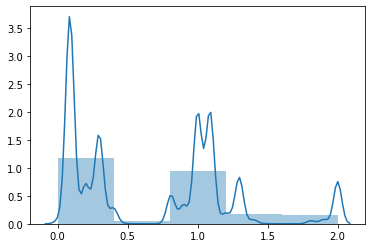

In [43]:
sns.distplot(liking1,bins = 5)
plt.show()

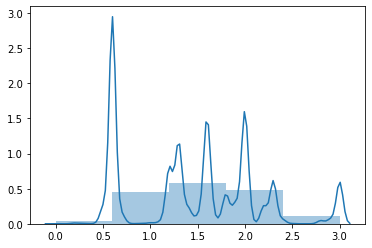

In [44]:
sns.distplot(liking2,bins = 5)
plt.show()

In [45]:
skip_score['liking'] = liking2


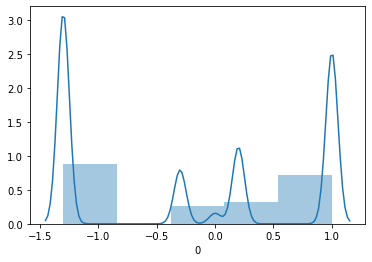

In [46]:
sns.distplot(skip_score[0],bins = 5)
plt.show()

In [47]:
from sklearn import preprocessing
liking_array = liking2.values


In [48]:
liking_array.shape

(3673820, 1)

In [49]:
normalized_X = preprocessing.normalize([liking_array])

ValueError: Found array with dim 3. the normalize function expected <= 2.

In [50]:
liking_array.shape

(3673820, 1)

In [51]:
liking_array

array([[0.6],
       [0.6],
       [1.2],
       ...,
       [1.6],
       [2.2],
       [2.2]])

In [118]:
zoopy = np.reshape(liking_array, (2, -1))

In [119]:
zoopy

array([[0.6, 0.6, 1.2, ..., 3. , 2.3, 2.3],
       [2.3, 1.6, 1.6, ..., 1.6, 2.2, 2.2]])

In [120]:
zoopy.shape

(2, 1836910)

In [121]:
zoopy = zoopy.transpose()

In [122]:
zoopy.transpose()

array([[0.6, 0.6, 1.2, ..., 3. , 2.3, 2.3],
       [2.3, 1.6, 1.6, ..., 1.6, 2.2, 2.2]])

In [123]:
zoopy

array([[0.6, 2.3],
       [0.6, 1.6],
       [1.2, 1.6],
       ...,
       [3. , 1.6],
       [2.3, 2.2],
       [2.3, 2.2]])

In [124]:
zoopy.shape

(1836910, 2)

In [125]:
def dropna(arr, *args, **kwarg):
    assert isinstance(arr, np.ndarray)
    dropped=pd.DataFrame(arr).dropna(*args, **kwarg).values
    if arr.ndim==1:
        dropped=dropped.flatten()
    return dropped
zoopy = dropna(zoopy)
#zoopy = zoopy[~np.isnan(zoopy)]
#zoopy = zoopy[np.isfinite(zoopy)]

In [126]:
zoopy.shape

(1836872, 2)

In [127]:
np.argwhere(np.isnan(zoopy))

array([], shape=(0, 2), dtype=int64)

In [128]:
normalized_zoopy = preprocessing.normalize(zoopy)

In [129]:
normalized_zoopy

array([[0.2524219 , 0.96761727],
       [0.35112344, 0.93632918],
       [0.6       , 0.8       ],
       ...,
       [0.88235294, 0.47058824],
       [0.72264186, 0.69122265],
       [0.72264186, 0.69122265]])

In [130]:
like = normalized_zoopy.reshape(-1,1)

In [131]:
like = pd.DataFrame(like)

In [132]:
like.head(10)

,0
0,0.252422
1,0.967617
2,0.351123
3,0.936329
4,0.600000
5,0.800000
6,0.630593
7,0.776114
8,0.447214
9,0.894427


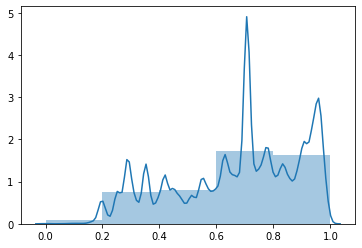

In [133]:
sns.distplot(like,bins = 5)
plt.show()

In [134]:
skip_score.head(10)

,0,liking
0,-0.3,0.6
1,0.2,0.6
2,1.0,1.2
3,-0.3,1.3
4,-1.3,0.6
5,-0.3,0.7
6,0.2,0.5
7,-0.3,0.7
8,-1.3,1.7
9,1.0,2.2


In [135]:
like.head()

,0
0,0.252422
1,0.967617
2,0.351123
3,0.936329
4,0.600000


In [136]:
skip_score['normalized_liking'] = like

In [137]:
mul_label = skip_score

In [138]:
mul_label.head()

,0,liking,normalized_liking
0,-0.3,0.6,0.252422
1,0.2,0.6,0.967617
2,1.0,1.2,0.351123
3,-0.3,1.3,0.936329
4,-1.3,0.6,0.600000


In [139]:
mul_label = mul_label.rename(columns = {0: "skip_score"})

In [140]:
mul_label.head(10)

,skip_score,liking,normalized_liking
0,-0.3,0.6,0.252422
1,0.2,0.6,0.967617
2,1.0,1.2,0.351123
3,-0.3,1.3,0.936329
4,-1.3,0.6,0.600000
5,-0.3,0.7,0.800000
6,0.2,0.5,0.630593
7,-0.3,0.7,0.776114
8,-1.3,1.7,0.447214
9,1.0,2.2,0.894427


In [141]:
df

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch
0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0
1,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,0,0.0,0.2,0,1
2,0_00001e52-55c0-470c-8d32-85c691c2019a,t_977b3ee2-e7a8-4357-b164-f663446c1a25,0,0.0,0.0,1,0
3,0_00001e52-55c0-470c-8d32-85c691c2019a,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,0,-0.5,0.2,0,0
4,0_00001e52-55c0-470c-8d32-85c691c2019a,t_b10f5a2a-ee7b-47c3-9789-4ce0f96c6989,-1,-0.5,0.2,0,0
...,...,...,...,...,...,...,...
3673815,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,-1,-0.5,0.2,0,0
3673816,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,-1,-0.5,0.2,0,0
3673817,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a004df37-97e0-4c20-999e-2844ddf9e733,-1,-0.5,0.2,0,0
3673818,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_508ab67d-dd11-478c-8b45-5c522df5e03d,-1,-0.5,0.2,0,0


In [144]:
df.rename(columns = {'track_id_clean':'track_id'}, inplace = True)
df['hist_user_behavior_reason_start'] = behavior['hist_user_behavior_reason_start']
df['hist_user_behavior_reason_end'] = behavior['hist_user_behavior_reason_end']
df['hist_user_behavior_is_shuffle'] = behavior['hist_user_behavior_is_shuffle']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [145]:
df

,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle
0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0,0.2,0.4,0
1,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,0,0.0,0.2,0,1,0.2,0.4,0
2,0_00001e52-55c0-470c-8d32-85c691c2019a,t_977b3ee2-e7a8-4357-b164-f663446c1a25,0,0.0,0.0,1,0,0.2,1.0,0
3,0_00001e52-55c0-470c-8d32-85c691c2019a,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,0,-0.5,0.2,0,0,1.0,0.3,0
4,0_00001e52-55c0-470c-8d32-85c691c2019a,t_b10f5a2a-ee7b-47c3-9789-4ce0f96c6989,-1,-0.5,0.2,0,0,0.3,0.3,0
...,...,...,...,...,...,...,...,...,...,...
3673815,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,-1,-0.5,0.2,0,0,1.0,0.3,1
3673816,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,-1,-0.5,0.2,0,0,0.3,0.3,1
3673817,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a004df37-97e0-4c20-999e-2844ddf9e733,-1,-0.5,0.2,0,0,0.3,0.3,1
3673818,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_508ab67d-dd11-478c-8b45-5c522df5e03d,-1,-0.5,0.2,0,0,0.3,0.9,1


In [146]:
print(len(mul_label))

3673820


In [147]:
df['skip_score'] = mul_label['skip_score']
df['liking'] = mul_label['liking']
df['rating'] = df['skip_score'] + df['liking']
df

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle,skip_score,liking,rating
0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0,0.2,0.4,0,-0.3,0.6,0.3
1,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a998907c-e11c-4a4e-b9d2-b34846bfb839,0,0.0,0.2,0,1,0.2,0.4,0,0.2,0.6,0.8
2,0_00001e52-55c0-470c-8d32-85c691c2019a,t_977b3ee2-e7a8-4357-b164-f663446c1a25,0,0.0,0.0,1,0,0.2,1.0,0,1.0,1.2,2.2
3,0_00001e52-55c0-470c-8d32-85c691c2019a,t_e2dda38d-f826-481b-b49a-a1d9051f5c6d,0,-0.5,0.2,0,0,1.0,0.3,0,-0.3,1.3,1.0
4,0_00001e52-55c0-470c-8d32-85c691c2019a,t_b10f5a2a-ee7b-47c3-9789-4ce0f96c6989,-1,-0.5,0.2,0,0,0.3,0.3,0,-1.3,0.6,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673815,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,-1,-0.5,0.2,0,0,1.0,0.3,1,-1.3,2.3,1.0
3673816,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,-1,-0.5,0.2,0,0,0.3,0.3,1,-1.3,1.6,0.3
3673817,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_a004df37-97e0-4c20-999e-2844ddf9e733,-1,-0.5,0.2,0,0,0.3,0.3,1,-1.3,1.6,0.3
3673818,0_fffff7ac-faea-4a39-aa66-770be5429a33,t_508ab67d-dd11-478c-8b45-5c522df5e03d,-1,-0.5,0.2,0,0,0.3,0.9,1,-1.3,2.2,0.9


In [148]:
dat1 = dat
dat = pd.read_csv(r'C:\Users\User\Downloads\20181120_track_features\track_features\tf_000000000001.csv')
df1 = pd.merge(df, dat, on = 'track_id')

In [152]:
df1

,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0,0.2,0.4,0,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
1,0_00a20441-f168-41c7-9bf6-93ddeb022f00,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
2,0_00e25cfa-fb17-4c17-a126-04dc55c66259,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
3,0_05c168a6-d905-427e-8a6a-4b12311fcb6d,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,0.3,1.0,0,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
4,0_05d6ac38-9e98-44de-b097-048f1c0f95db,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,1.0,1.0,0,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870450,0_fffd79ea-ddae-4200-be2e-8152c85d7f9f,t_02bb5521-e44a-4e37-8da8-34fe29864157,0,0.0,0.0,1,1,0.2,1.0,0,...,4,0.290829,-0.812441,0.177448,0.249105,0.338340,-0.125992,0.082681,-0.072090,0.248295
1870451,0_fffef4da-9663-4898-b689-439966333d9c,t_8cdc2107-a0ff-4cf8-9c7e-f78305183fb1,0,0.0,0.0,1,0,1.0,1.0,1,...,4,0.372372,-0.732193,0.249331,0.208726,0.116819,-0.224502,-0.001379,-0.437451,0.123034
1870452,0_fffef4da-9663-4898-b689-439966333d9c,t_197534e3-d3ee-4731-90d1-de65ef06b748,-1,-0.5,0.2,0,0,0.3,0.3,1,...,4,0.681922,-0.943088,0.279992,0.188085,0.181983,-0.292232,-0.085075,-0.581773,0.157372
1870453,0_fffef4da-9663-4898-b689-439966333d9c,t_bfd37181-1b0e-4ab0-b528-1beabca7735b,0,-0.5,0.2,0,0,0.3,0.3,1,...,4,0.903801,-0.221563,-0.052246,0.041409,0.066371,-0.377817,0.001521,-0.205437,0.382329


In [157]:
dat1.rename(columns = {'track_id_clean':'track_id'}, inplace = True)
df2 = pd.merge(dat1, dat, on = 'track_id')
df2

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00001e52-55c0-470c-8d32-85c691c2019a,1,16,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,True,True,False,0,0,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
1,0_00a20441-f168-41c7-9bf6-93ddeb022f00,10,20,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,False,True,False,0,1,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
2,0_00e25cfa-fb17-4c17-a126-04dc55c66259,3,20,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,False,True,False,0,1,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
3,0_05c168a6-d905-427e-8a6a-4b12311fcb6d,7,20,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,False,False,True,0,1,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
4,0_05d6ac38-9e98-44de-b097-048f1c0f95db,6,16,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,False,False,False,True,0,1,...,4,0.844416,-0.618357,0.390469,0.448867,0.275075,0.144140,0.088700,0.463565,0.083241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870450,0_fffd79ea-ddae-4200-be2e-8152c85d7f9f,10,20,t_02bb5521-e44a-4e37-8da8-34fe29864157,False,False,False,True,1,1,...,4,0.290829,-0.812441,0.177448,0.249105,0.338340,-0.125992,0.082681,-0.072090,0.248295
1870451,0_fffef4da-9663-4898-b689-439966333d9c,3,20,t_8cdc2107-a0ff-4cf8-9c7e-f78305183fb1,False,False,False,True,0,1,...,4,0.372372,-0.732193,0.249331,0.208726,0.116819,-0.224502,-0.001379,-0.437451,0.123034
1870452,0_fffef4da-9663-4898-b689-439966333d9c,6,20,t_197534e3-d3ee-4731-90d1-de65ef06b748,True,True,True,False,0,1,...,4,0.681922,-0.943088,0.279992,0.188085,0.181983,-0.292232,-0.085075,-0.581773,0.157372
1870453,0_fffef4da-9663-4898-b689-439966333d9c,8,20,t_bfd37181-1b0e-4ab0-b528-1beabca7735b,False,True,True,False,0,1,...,4,0.903801,-0.221563,-0.052246,0.041409,0.066371,-0.377817,0.001521,-0.205437,0.382329


In [158]:
df2.to_csv('dat.csv')

In [149]:
df = df1[['session_id','track_id', 'skip_1', 'skip_2', 'skip_3', 'not_skipped','context_switch',
          'hist_user_behavior_reason_start','hist_user_behavior_reason_end','hist_user_behavior_is_shuffle',
         'skip_score','liking','rating']]

In [150]:
df

,session_id,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hist_user_behavior_is_shuffle,skip_score,liking,rating
0,0_00001e52-55c0-470c-8d32-85c691c2019a,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,-0.5,0.2,0,0,0.2,0.4,0,-0.3,0.6,0.3
1,0_00a20441-f168-41c7-9bf6-93ddeb022f00,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,0.2,0.6,0.8
2,0_00e25cfa-fb17-4c17-a126-04dc55c66259,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.2,0,0,0.2,0.4,0,0.2,0.6,0.8
3,0_05c168a6-d905-427e-8a6a-4b12311fcb6d,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,0.3,1.0,0,1.0,1.3,2.3
4,0_05d6ac38-9e98-44de-b097-048f1c0f95db,t_a0b2a533-caad-4a72-af14-e647bd7e9c1f,0,0.0,0.0,1,0,1.0,1.0,0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870450,0_fffd79ea-ddae-4200-be2e-8152c85d7f9f,t_02bb5521-e44a-4e37-8da8-34fe29864157,0,0.0,0.0,1,1,0.2,1.0,0,1.0,1.2,2.2
1870451,0_fffef4da-9663-4898-b689-439966333d9c,t_8cdc2107-a0ff-4cf8-9c7e-f78305183fb1,0,0.0,0.0,1,0,1.0,1.0,1,1.0,3.0,4.0
1870452,0_fffef4da-9663-4898-b689-439966333d9c,t_197534e3-d3ee-4731-90d1-de65ef06b748,-1,-0.5,0.2,0,0,0.3,0.3,1,-1.3,1.6,0.3
1870453,0_fffef4da-9663-4898-b689-439966333d9c,t_bfd37181-1b0e-4ab0-b528-1beabca7735b,0,-0.5,0.2,0,0,0.3,0.3,1,-0.3,1.6,1.3


In [151]:
df.to_csv('merged.csv')